# <center> UE22CS342AA2 - Data Analytics </center>

# <center> Worksheet 4b : Association rule mining (Market Basket Analysis) </center>

<center> Designed by Amritha GK, PESU-25 </center>

<br>

- Student name: Neha Nair
- SRN: PES2UG22CS348
- Section: F

Assume that you travel to another parallel universe, where your alter-ego owns a side-hustle retail store. You decide to take up an exercise on association rule mining to improve your skills and extract some essential information to help your alter-ego grow their business.

Given is a dataset that contains some information regarding the transactions at the hypothetical "store".



### About the Dataset:

- BillNo - Identifier for the transaction

- Itemname - Name of the product

- Quantity - Product quantity

- Date - Date and time of the transaction

- Price - Price per item (assumed in Pound Sterling) 

- CustomerID - Identifier for the customer

- Country


For those solving with R, Use the **'arules'** and **'arulesViz'** package wherever necessary.

For those solving with Python, use the **'mlxtend'** or **'apyori'** or any other suitable package wherever necessary

## Install the required packages

In [22]:
install.packages(readxl)

install.packages("arules")

install.packages("arulesViz")

ERROR: Error in eval(expr, envir, enclos): object 'readxl' not found


## Load the required packages

In [ ]:
library(readxl)

library(dplyr)

library(arules)

library(arulesViz)

## Load the dataset and create dataframe

In [23]:
# Your code here
# Load the dataset with explicit column types
data <- read_excel("/kaggle/input/online-retail-dataset/Worksheet-4b_Online_retail_dataset.xlsx")

Warning message:
“Expecting numeric in A288774 / R288774C1: got 'A563185'”
Warning message:
“Expecting numeric in A288775 / R288775C1: got 'A563186'”
Warning message:
“Expecting numeric in A288776 / R288776C1: got 'A563187'”


In [24]:
head(data)

BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
<dbl>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<chr>
536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
536365,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom


In [25]:
str(data)

tibble [522,064 × 7] (S3: tbl_df/tbl/data.frame)
 $ BillNo    : num [1:522064] 536365 536365 536365 536365 536365 ...
 $ Itemname  : chr [1:522064] "WHITE HANGING HEART T-LIGHT HOLDER" "WHITE METAL LANTERN" "CREAM CUPID HEARTS COAT HANGER" "KNITTED UNION FLAG HOT WATER BOTTLE" ...
 $ Quantity  : num [1:522064] 6 6 8 6 6 2 6 6 6 32 ...
 $ Date      : POSIXct[1:522064], format: "2010-12-01 08:26:00" "2010-12-01 08:26:00" ...
 $ Price     : num [1:522064] 2.55 3.39 2.75 3.39 3.39 7.65 4.25 1.85 1.85 1.69 ...
 $ CustomerID: num [1:522064] 17850 17850 17850 17850 17850 ...
 $ Country   : chr [1:522064] "United Kingdom" "United Kingdom" "United Kingdom" "United Kingdom" ...


## Dataset preparation

Perform data cleaning, Transform the representation as suitable for this problem

Some hints to help you get started:
- Check the summary, number of rows and columns
- Remove duplicate entries
- Check which columns contain information that is necessary for this exercise
- Remove rows with NA values in these columns.

### (1 point)

     BillNo         Itemname            Quantity       
 Min.   :536365   Length:522064      Min.   :-9600.00  
 1st Qu.:547892   Class :character   1st Qu.:    1.00  
 Median :560603   Mode  :character   Median :    3.00  
 Mean   :559951                      Mean   :   10.09  
 3rd Qu.:571892                      3rd Qu.:   10.00  
 Max.   :581587                      Max.   :80995.00  
 NA's   :3                                             
      Date                            Price              CustomerID    
 Min.   :2010-12-01 08:26:00.00   Min.   :-11062.060   Min.   :12346   
 1st Qu.:2011-03-28 10:15:00.00   1st Qu.:     1.250   1st Qu.:13950   
 Median :2011-07-20 08:59:00.00   Median :     2.080   Median :15265   
 Mean   :2011-07-04 12:51:20.77   Mean   :     3.827   Mean   :15317   
 3rd Qu.:2011-10-19 14:12:00.00   3rd Qu.:     4.130   3rd Qu.:16837   
 Max.   :2011-12-09 12:50:00.00   Max.   : 13541.330   Max.   :18287   
                                                

[1] 522064      7

     BillNo         Itemname            Quantity          CustomerID   
 Min.   :536365   Length:382811      Min.   :    1.00   Min.   :12346  
 1st Qu.:549234   Class :character   1st Qu.:    2.00   1st Qu.:13928  
 Median :561873   Mode  :character   Median :    6.00   Median :15249  
 Mean   :560585                      Mean   :   13.03   Mean   :15310  
 3rd Qu.:572088                      3rd Qu.:   12.00   3rd Qu.:16820  
 Max.   :581587                      Max.   :80995.00   Max.   :18287  

Warning message in asMethod(object):
“removing duplicated items in transactions”


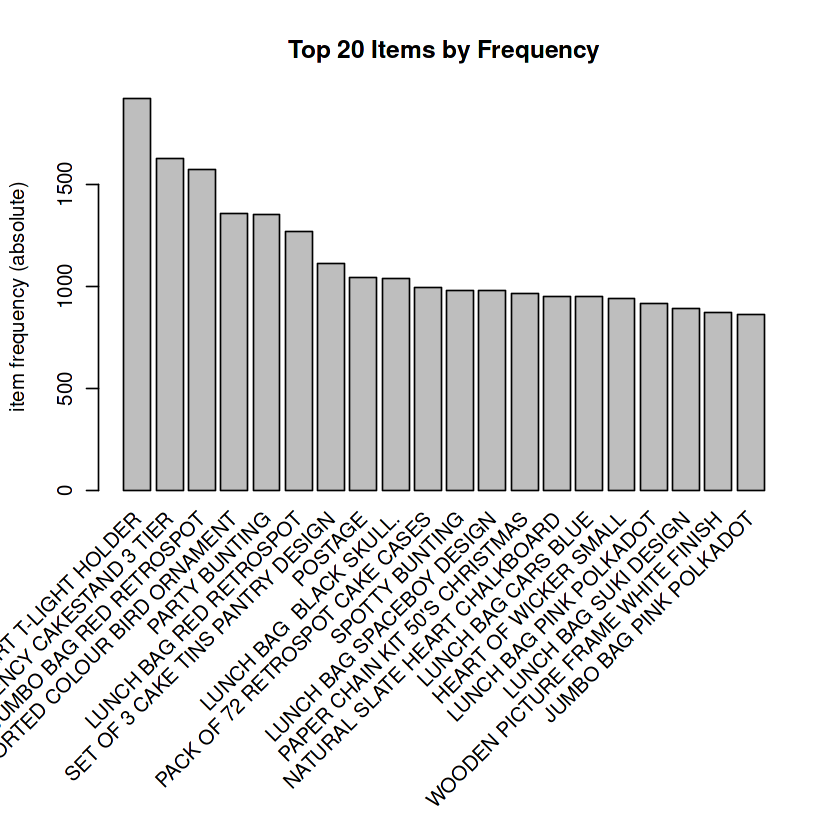

In [26]:
summary(data)
dim(data)
# Remove duplicate rows
data_clean <- distinct(data)

# Check the number of rows after removing duplicates
data_clean <- distinct(data)

# Step 3: Select relevant columns
data_clean <- subset(data_clean, select = c(BillNo, Itemname, Quantity, CustomerID))

# Step 4: Remove rows with NA values in necessary columns
data_clean <- data_clean[!is.na(data_clean$BillNo) & !is.na(data_clean$Itemname) & !is.na(data_clean$Quantity) & !is.na(data_clean$CustomerID), ]

# Check the cleaned dataset
summary(data_clean)

# Convert the dataframe into a list of transactions
transaction_list <- split(data_clean$Itemname, data_clean$BillNo)

# Convert the list into a transactions object
trans <- as(transaction_list, "transactions")

# Create an item frequency plot
itemFrequencyPlot(trans, topN = 20, type = "absolute", main = "Top 20 Items by Frequency")


## Problem 1

1. What are the 10 most popular itemsets, given Minimum Support Count = 0.02? Display the itemsets, frequency and support.

2. Find Confidence and Lift of the association rule "{PINK REGENCY TEACUP AND SAUCER} => {GREEN REGENCY TEACUP AND SAUCER}".

3. Based on the value of Lift, what do you infer regarding the given association rule?


### 3 points (1+1+1)

In [27]:
# Your code here
frequent_items<- apriori(trans, parameter = list(support = 0.02, target = "frequent itemsets"))

top_10 <- head(sort(frequent_items, by = "support", decreasing = TRUE), 10)
inspect(top_10)

rules <- apriori(trans, parameter = list(support = 0.02, confidence = 0.1, target = "rules"))
specific_rule <- subset(rules, lhs %in% "PINK REGENCY TEACUP AND SAUCER" & rhs %in% "GREEN REGENCY TEACUP AND SAUCER")
inspect(specific_rule)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 363 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[3846 item(s), 18163 transaction(s)] done [0.15s].
sorting and recoding items ... [206 item(s)] done [0.01s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 done [0.00s].
sorting transactions ... done [0.00s].
writing ... [240 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     items                                support    count
[1]  {WHITE HANGING HEART T-LIGHT HOLDER} 0.10565435 1919 
[2]  {REGENCY CAKESTAND 3 TIER}           0.08957771 1627 
[3]  {JUMBO BAG RED RETROSPOT}            0.086

## Problem 2

1. What are the top-5 itemsets that you would recommend for cross-selling?

Hint: Association rules. List the antecedents, consequents, support, confidence and lift.


2. Recount a personal experience where you have come across cross-selling or up-selling in any of your purchases (be it online, at restaurants or some other place). Was it useful to you? Did you accept or decline the offer?



### 2 points (1+1)

In [29]:
# Your code here
rules <- apriori(trans, parameter = list(support = 0.02, confidence = 0.1, target = "rules"))
sorted_rules <- sort(rules, by = c("lift", "confidence"), decreasing = TRUE)

top_5_rules <- head(sorted_rules, 5)
inspect(top_5_rules)

cross_selling<- data.frame(
  Antecedent = labels(lhs(top_5_rules)),Consequent = labels(rhs(top_5_rules)),
  Support = quality(top_5_rules)$support,Confidence = quality(top_5_rules)$confidence,
  Lift = quality(top_5_rules)$lift
)

print(cross_selling)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5    0.02      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 363 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[3846 item(s), 18163 transaction(s)] done [0.15s].
sorting and recoding items ... [206 item(s)] done [0.01s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [69 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                                  rhs                                  support confidence   coverage     lift count
[1] {PINK REGENCY TEACUP AND SAUCER}  => {GREEN REGENCY TEACUP AND SAUCER} 0.02378462  0.8212928 0.02895997 22.84401   432
[2] {GREEN REGENCY TEACUP AND SAUCER} =

## Problem 3

Find out a new set of association rules with minimum support=0.025 and minimum confidence = 0.7.

1. Plot a graph of the first 5 association rules (sorted by confidence). 
What are the 3 most important rules on this graph?
2. For R, Plot a Grouped Matrix using these rules, with k = 20. ('k' is the number of groups of itemsets that will be plotted. State 2 points of observations from the plot.
3. For Python, Visualize a scatter plot of the support against confidence (label the corresponding rule). State 2 points of observations from the plot.

For those using the *'arulesViz'* package. You can refer the necessary sections in the documentation of the package for a better understanding on how to interpret the graphs.grphs.



### 4 points (2+2)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.7    0.1    1 none FALSE            TRUE       5   0.025      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 454 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[3846 item(s), 18163 transaction(s)] done [0.16s].
sorting and recoding items ... [136 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [2 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                                    rhs                                   support confidence   coverage     lift count
[1] {GREEN REGENCY TEACUP AND SAUCER}   => {ROSES REGENCY TEACUP AND SAUCER}  0.02785883  0.7748851 0.03595221 19.17471   506
[2] {GARDENERS KNEELING PAD CUP OF

Warning message:
“Unknown control parameters: type”


Available control parameters (with default values):
layout	 =  stress
circular	 =  FALSE
ggraphdots	 =  NULL
edges	 =  <environment>
nodes	 =  <environment>
nodetext	 =  <environment>
colors	 =  c("#EE0000FF", "#EEEEEEFF")
engine	 =  ggplot2
max	 =  100
verbose	 =  FALSE


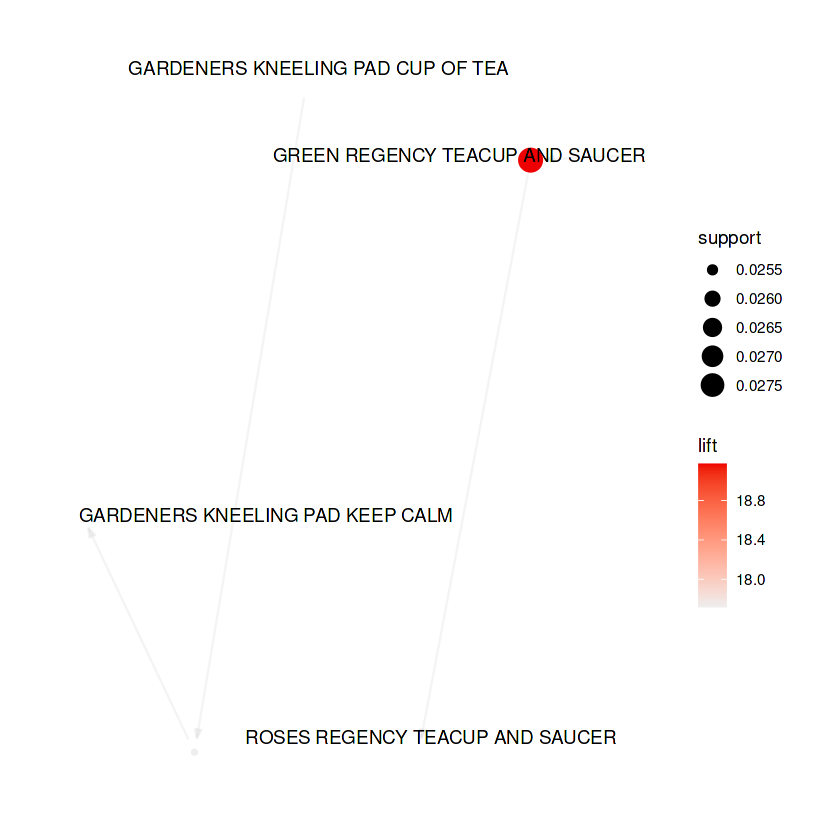

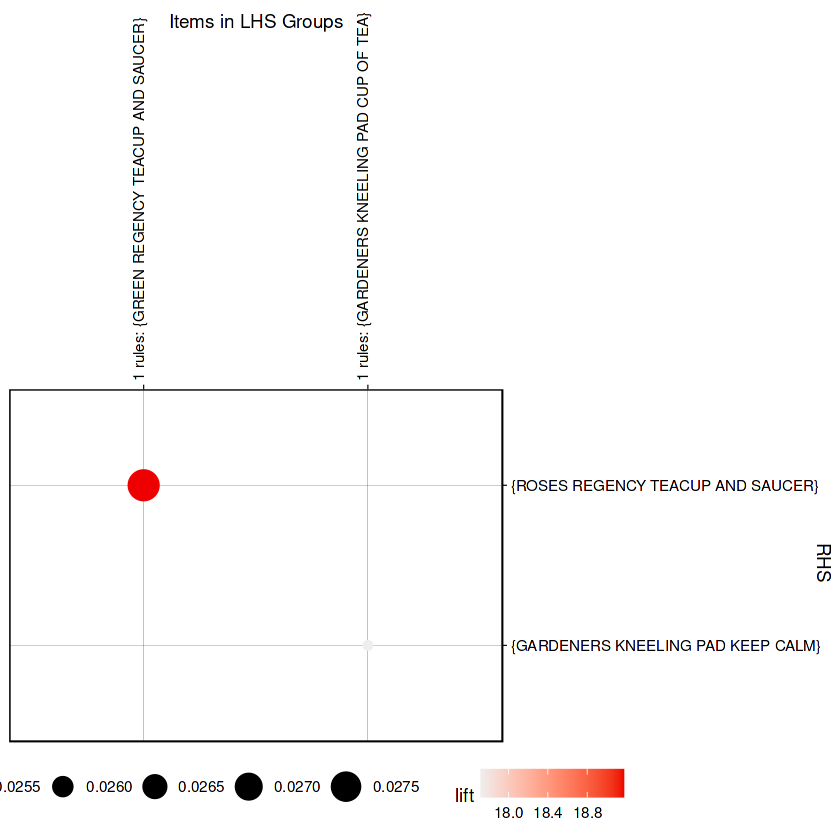

In [35]:
rules <- apriori(trans, parameter = list(support = 0.025, confidence = 0.7, target = "rules"))

rules_sorted <- sort(rules, by = "confidence", decreasing = TRUE)

num_rules <- length(rules_sorted)

inspect(head(rules_sorted))

num_rules_to_plot <- min(5, num_rules)  # Ensure no out-of-bounds indexing
plot(rules_sorted[1:num_rules_to_plot], method = "graph", control = list(type = "items"))
plot(rules_sorted, method = "grouped", control = list(k = 20))

------

With this, we draw a close to our multiverse adventure and head back to our original world.



Hope this exercise helped you learn something new and hone your skills as a Data Analyst!



Until next time :)